# Random Forest Regression: Predicting Property Sales Prices of King County Housing Properties
##### This code uses King Country housing data to train a Random Forest Regressor model.
##### We then tested the model's performance on a test subset of the King County Housing Data.

###### We referenced parts of the following article to assist us with building the model: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 

## Import necessary libraries, read in input csv, and perform additional clean-up on input data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import hvplot.pandas

In [2]:
# Read in King County housing data
kc_house_prices = pd.read_csv("../Input_Data/kc_house_data_clean.csv")
kc_house_prices.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Create separate dataset consisting of house price features and view summary statistics
kc_housing_features = kc_house_prices.drop(columns=["price", "date"])
features_stat_overview = kc_housing_features.describe()
features_stat_overview

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Creating testing and training X (features) and y (target) datasets

In [4]:
# Create features X dataset
X = kc_housing_features.copy()
X = np.array(X)
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [5]:
# Create target y dataset
y = np.array(kc_house_prices["price"])
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [6]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

# Take a quick look at the size of the train and test datasets
print(f"Size of training features dataset: {(X_train.shape)}")
print(f"Size of training target dataset: {(y_train.shape)}")
print(f"Size of testing features dataset: {(X_test.shape)}")
print(f"Size of testing target dataset: {(y_test.shape)}")

Size of training features dataset: (16209, 18)
Size of training target dataset: (16209,)
Size of testing features dataset: (5404, 18)
Size of testing target dataset: (5404,)


## Train Random Forest Regressor Model

In [7]:
# Initiate Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=23)

In [8]:
# Fit RF Regressor Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=23)

## Make Predictions on Testing and Training Data

In [9]:
# Make out-of-sample predictions with testing dataset
predictions = rf_model.predict(X_test)

# Make in-sample predictions with training dataset
in_predictions = rf_model.predict(X_train)

## Visualize Model Results

In [10]:
# Prepare data for visualizations
test_actuals = pd.DataFrame(y_test, columns=["Actual Sales Price"])
test_predicted = pd.DataFrame(predictions, columns=["Predicted Sales Price"])
out_of_sample = test_actuals.join(test_predicted)
out_of_sample["Variance"] = (out_of_sample["Actual Sales Price"] - out_of_sample["Predicted Sales Price"])

# Check shape of visualization dataframes. Confirm that join worked as intended.
print(test_actuals.shape)
print(test_predicted.shape)
print(out_of_sample.shape)

(5404, 1)
(5404, 1)
(5404, 3)


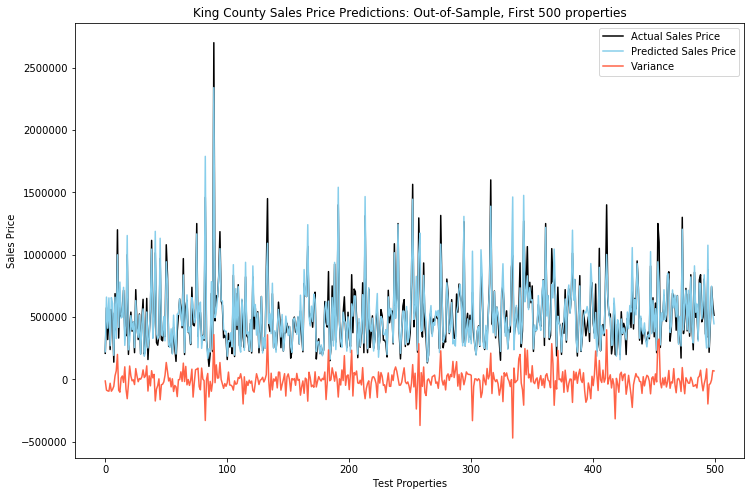

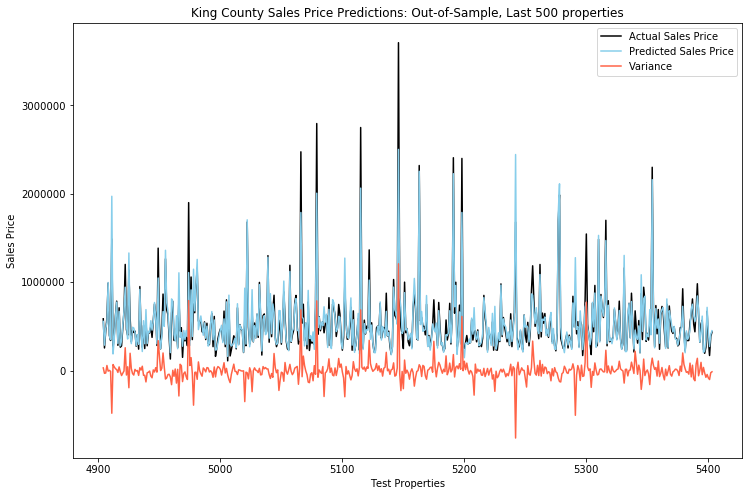

In [11]:
# Plot actual vs. predicated sales prices for first 500 properties and last 500 properties in testing population
test_first500 = out_of_sample.head(500).plot(figsize=(12,8), 
                                             title="King County Sales Price Predictions: Out-of-Sample, First 500 properties", 
                                             color=["black", "skyblue", "tomato"],
                                             xlabel="Test Properties",
                                             ylabel="Sales Price"
                                            )
test_last500 = out_of_sample.tail(500).plot(figsize=(12,8),
                                            title="King County Sales Price Predictions: Out-of-Sample, Last 500 properties", 
                                            color=["black", "skyblue", "tomato"],
                                            xlabel="Test Properties",
                                            ylabel="Sales Price")

# Save plots
test_first500.figure.savefig("../Images/rf_reg_sales_price1.png")
test_last500.figure.savefig("../Images/rf_reg_sales_price2.png")

In [12]:
# Prepare data for hvplot
out_of_sample_hv = out_of_sample.copy()
out_of_sample_hv["Actual Sales Price"] = out_of_sample_hv["Actual Sales Price"]/1000
out_of_sample_hv["Predicted Sales Price"] = out_of_sample_hv["Predicted Sales Price"]/1000
out_of_sample_hv["Variance"] = out_of_sample_hv["Variance"]/1000

In [13]:
# Plot actual vs. predicated sales prices for first 500 properties and last 500 properties in testing population - hvplot
out_of_sample_hv.head(500).hvplot.line(title = "King County Sales Price Predictions: Out-of-Sample, First 500 Properties",
            xlabel="Test Properties", 
            ylabel="Median Price (In $Thousands)",
            color=["black", "skyblue", "tomato"],
            height=600,
            width=1200
           )

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [14]:
# Plot actual vs. predicated sales prices for last 500 properties in testing dataset- hvplot
out_of_sample_hv.tail(500).hvplot.line(title = "King County Sales Price Predictions: Out-of-Sample, Last 500 Properties",
            xlabel="Test Properties", 
            ylabel="Median Price (In $Thousands)",
            color=["black", "skyblue", "tomato"],
            height=600,
            width=1200
           )

:NdOverlay   [Variable]
   :Curve   [index]   (value)

## Produce Model Performance Metrics

In [15]:
# Out-of-sample Performance
r2_score = round(100 * metrics.r2_score(y_test, predictions),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2)
mae = round(metrics.mean_absolute_error(y_test, predictions),2)
mape = round((100 * metrics.mean_absolute_percentage_error(y_test, predictions)),2)
accuracy = (100 - mape)

# In-Sample Performance
in_r2_score = round(100 * metrics.r2_score(y_train, in_predictions),2)
in_rmse = round(np.sqrt(metrics.mean_squared_error(y_train, in_predictions)),2)
in_mae = round(metrics.mean_absolute_error(y_train, in_predictions),2)
in_mape = round((100 * metrics.mean_absolute_percentage_error(y_train, in_predictions)),2)
in_accuracy = (100 - in_mape)

In [16]:
# Print model performance metrics
print(f"Random Forest Regression Out-of-Sample Results:")
print(f"RF Regression Out-of-Sample R2 Score: {r2_score}%")
print(f"RF Regression Out-of-Sample Root Mean Squared Error: ${rmse}")
print(f"RF Regression Out-of-Sample Mean Absolute Error: ${mae}")
print(f"RF Regression Out-of-Sample Mean Absolute Percentage Error: {mape}%")
print(f"RF Regression Out-of-Sample Accuracy: {accuracy}%", '\n')

print(f"Random Forest Regression In-Sample Results:")
print(f"RF Regression In-Sample R2 Score: {in_r2_score}%")
print(f"RF Regression In-Sample Root Mean Squared Error: ${in_rmse}")
print(f"RF Regression In-Sample Mean Absolute Error: ${in_mae}")
print(f"RF Regression In-Sample Mean Absolute Percentage Error: {in_mape}%")
print(f"RF Regression In-Sample Accuracy: {in_accuracy}%")

# Save performance metrics to text file
# Source: https://stackoverflow.com/questions/36571560/directing-print-output-to-a-txt-file
with open("../Regression_Metrics/random_forest_performance_metrics.txt", "w") as file:
    print(f"Random Forest Regression Out-of-Sample Results:", '\n', file=file)
    print(f"RF Regression Out-of-Sample R2 Score: {r2_score}%", file=file)
    print(f"RF Regression Out-of-Sample Root Mean Squared Error: ${rmse}", file=file)
    print(f"RF Regression Out-of-Sample Mean Absolute Error: ${mae}", file=file)
    print(f"RF Regression Out-of-Sample Mean Absolute Percentage Error: {mape}%", file=file)
    print(f"RF Regression Out-of-Sample Accuracy: {accuracy}%", '\n', file=file)
    print(f"Random Forest Regression In-Sample Results:", '\n', file=file)
    print(f"RF Regression In-Sample R2 Score: {in_r2_score}%", file=file)
    print(f"RF Regression In-Sample Root Mean Squared Error: ${in_rmse}", file=file)
    print(f"RF Regression In-Sample Mean Absolute Error: ${in_mae}", file=file)
    print(f"RF Regression In-Sample Mean Absolute Percentage Error: {in_mape}%", file=file)
    print(f"RF Regression In-Sample Accuracy: {in_accuracy}%", file=file)

Random Forest Regression Out-of-Sample Results:
RF Regression Out-of-Sample R2 Score: 87.1%
RF Regression Out-of-Sample Root Mean Squared Error: $125130.65
RF Regression Out-of-Sample Mean Absolute Error: $67752.31
RF Regression Out-of-Sample Mean Absolute Percentage Error: 12.82%
RF Regression Out-of-Sample Accuracy: 87.18% 

Random Forest Regression In-Sample Results:
RF Regression In-Sample R2 Score: 98.31%
RF Regression In-Sample Root Mean Squared Error: $48472.69
RF Regression In-Sample Mean Absolute Error: $25692.84
RF Regression In-Sample Mean Absolute Percentage Error: 4.89%
RF Regression In-Sample Accuracy: 95.11%
